# **ML Project**

In [1]:
#load libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#load dataset
df = pd.read_csv('C:/Users/dorwi/Desktop/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **Data Preparation**

## Data seperation as X and Y

In [3]:
#isolate response variable
logS = df['logS']
logS

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
#create new df without response var 'logS'
dataset = df.drop('logS', axis=1)
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting

In [5]:
#Split the data into 80% training, 20% testing with a seed (100) for reproducibility.
dataset_train, dataset_test, logS_train, logS_test = train_test_split(dataset, logS, test_size= 0.2, random_state= 100)

# **Model Building**

## Linear Regression Model

#### **Training the model**

In [6]:
lr = LinearRegression()

lr.fit(dataset_train, logS_train)


LinearRegression()

#### **Applying the model to make a prediction**

In [7]:
logS_lr_train_pred = lr.predict(dataset_train)

logS_lr_test_pred = lr.predict(dataset_test)

In [8]:
print(logS_lr_train_pred)

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

#### **Evaluate model performance**

In [14]:
#Evaluating the lr model on training dataset
lr_train_mse = mean_squared_error(logS_train, logS_lr_train_pred)

lr_train_r2 = r2_score(logS_train, logS_lr_train_pred)


#Evaluating the lr model on testing dataset
lr_test_mse = mean_squared_error(logS_test, logS_lr_test_pred)

lr_test_r2 = r2_score(logS_test, logS_lr_test_pred)

#Printing out the results

#print(f'Training Dataset ==> lr Mean Squared Error : {lr_train_mse} \n')
#print(f'Training Dataset ==> lr R Squared          : {lr_train_r2} \n')
#print(f'Testing Dataset  ==> lr Mean Squared Error : {lr_test_mse} \n')
#print(f'Testing Dataset  ==> lr R Squared          : {lr_test_r2} \n')

lr_results = pd.DataFrame(['LinearRegression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns= ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


## **Random Forest Model**

#### Training the model

In [15]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(dataset_train, logS_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applying the model to make a prediction

In [16]:
logS_rf_train_pred = rf.predict(dataset_train)

logS_rf_test_pred = rf.predict(dataset_test)

#### Evaluate model performance

In [19]:

rf_train_mse = mean_squared_error(logS_train, logS_rf_train_pred)
rf_train_r2 = r2_score(logS_train, logS_rf_train_pred)

rf_test_mse = mean_squared_error(logS_test, logS_rf_test_pred)
rf_test_r2 = r2_score(logS_test, logS_rf_test_pred)


#print results
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns= ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [23]:
df_models = pd.concat([lr_results, rf_results]).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualzation of prediction results**

In [35]:
import matplotlib.pyplot as plt
import numpy as np

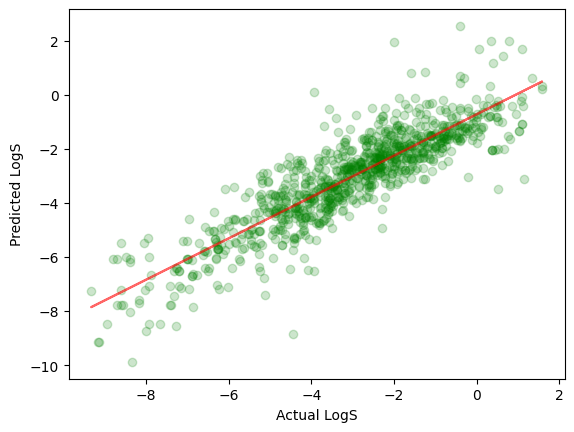

In [43]:
plt.scatter(x = logS_train, y = logS_lr_train_pred, color='green', alpha=0.2)

plt.xlabel('Actual LogS')
plt.ylabel('Predicted LogS')

z = np.polyfit(logS_train, logS_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(logS_train, p(logS_train), 'red', alpha=0.6)